In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
combined_data_together_overall = pd.read_excel("Monthly Data.xlsx", usecols=lambda x: 'Unnamed' not in x)
combined_changed_data_together_overall = pd.read_excel("Yearly Change Data.xlsx", usecols=lambda x: 'Unnamed' not in x)
combined_changed_data_together_overall_percent = pd.read_excel("Yearly % Change Data.xlsx", usecols=lambda x: 'Unnamed' not in x)

In [27]:
combined_data_together_overall

Year_Month  live births no.  Total Infant Deaths  number of marriages  \
0   1960-01-01             4981                  157                  NaN   
1   1960-02-01             4596                  154                  NaN   
2   1960-03-01             4964                  189                  NaN   
3   1960-04-01             4904                  193                  NaN   
4   1960-05-01             5244                  235                  NaN   
..         ...              ...                  ...                  ...   
751 2022-08-01             3005                    7               1138.0   
752 2022-09-01             3272                    7               2211.0   
753 2022-10-01             3109                    4               2024.0   
754 2022-11-01             2943                    7               2445.0   
755 2022-12-01             2887                    9               2699.0   

     CPI values(seasonally adjusted)  CPI values(non-seasonally adjusted)  \
0                                NaN                                  NaN   
1                                NaN                                  NaN   
2                                NaN                                  NaN   
3                                NaN                                  NaN   
4                                NaN                                  NaN   
..                               ...                                  ...   
751                          109.679                              109.863   
752                          110.154                              110.339   
753                          110.223                              109.893   
754                          110.773                              110.959   
755                          111.000                              111.186   

     Inflation(CPI % change from previous month, seasonally adjusted)  \
0                                                  NaN                  
1                                                  NaN                  
2                                                  NaN                  
3                                                  NaN                  
4                                                  NaN                  
..                                                 ...                  
751                                           0.004736                  
752                                           0.004331                  
753                                           0.000626                  
754                                           0.004990                  
755                                           0.002049                  

     Inflation(CPI % change from previous month, non-seasonally adjusted)  \
0                                                  NaN                      
1                                                  NaN                      
2                                                  NaN                      
3                                                  NaN                      
4                                                  NaN                      
..                                                 ...                      
751                                           0.009436                      
752                                           0.004333                      
753                                          -0.004042                      
754                                           0.009700                      
755                                           0.002046                      

     Resale House Avg Price  Resale Houses Sold  
0                       NaN                 NaN  
1                       NaN                 NaN  
2                       NaN                 NaN  
3                       NaN                 NaN  
4                       NaN                 NaN  
..                      ...                 ...  
75

In [28]:
monthly_live_birth = combined_data_together_overall.iloc[:, :2]
monthly_live_birth

Year_Month  live births no.
0   1960-01-01             4981
1   1960-02-01             4596
2   1960-03-01             4964
3   1960-04-01             4904
4   1960-05-01             5244
..         ...              ...
751 2022-08-01             3005
752 2022-09-01             3272
753 2022-10-01             3109
754 2022-11-01             2943
755 2022-12-01             2887

[756 rows x 2 columns]

In [29]:
live_birth_monthly_change = pd.DataFrame(columns=["Year_Month", "Change in Live Birth"])
for i in range(1, monthly_live_birth.shape[0]):
    if ((monthly_live_birth.iloc[i, 1] - monthly_live_birth.iloc[i-1, 1]) > 0):
        change = "INCREASE"
    else:
        change = "DECREASE"
    live_birth_monthly_change.loc[i] = [monthly_live_birth.iloc[i, 0], change]   
live_birth_monthly_change

Year_Month Change in Live Birth
1   1960-02-01             DECREASE
2   1960-03-01             INCREASE
3   1960-04-01             DECREASE
4   1960-05-01             INCREASE
5   1960-06-01             DECREASE
..         ...                  ...
751 2022-08-01             INCREASE
752 2022-09-01             INCREASE
753 2022-10-01             DECREASE
754 2022-11-01             DECREASE
755 2022-12-01             DECREASE

[755 rows x 2 columns]

## KNN (Raw Data)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

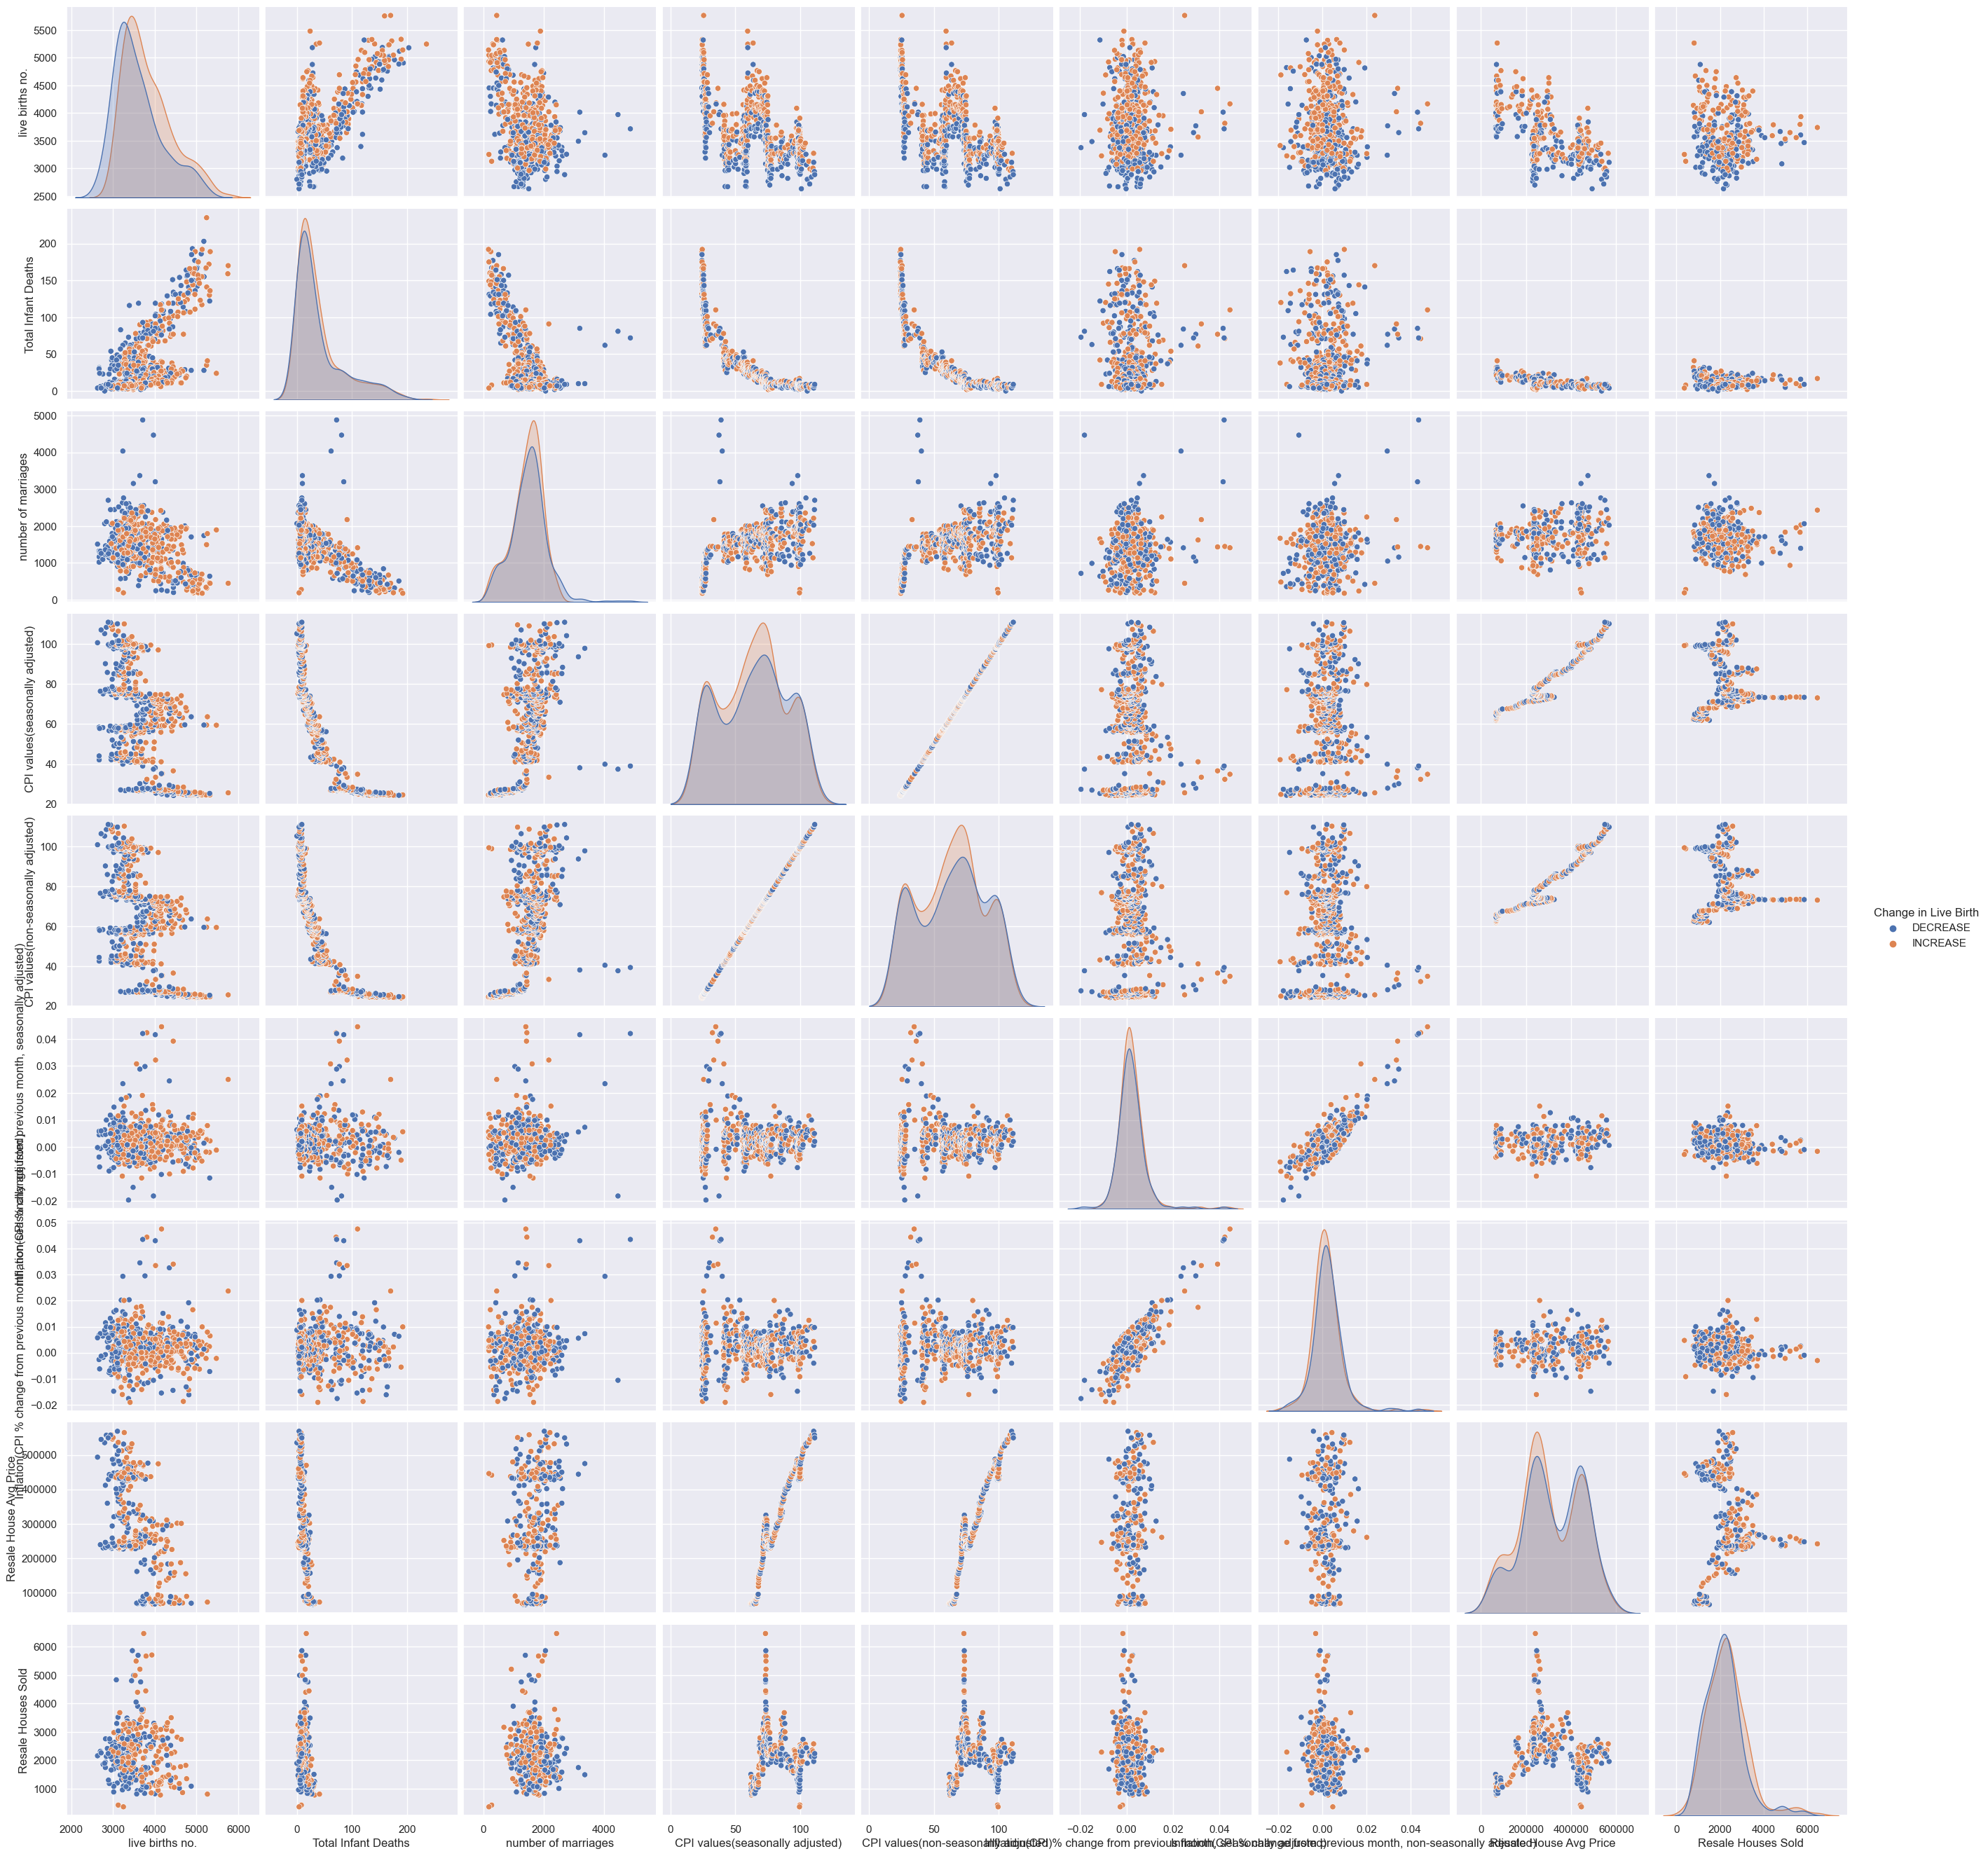

In [57]:
combined_data_together_overall_temp = combined_data_together_overall.iloc[1:,:].copy()
combined_data_together_overall_temp.insert(1, live_birth_monthly_change.columns[1], live_birth_monthly_change.iloc[:, 1])

sb.pairplot(combined_data_together_overall_temp, hue="Change in Live Birth", height=3);
plt.show()

C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\2655111222.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp_X.fillna(temp_X.mean(), inplace=True)
C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\2655111222.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_X.fillna(temp_X.mean(), inplace=True)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

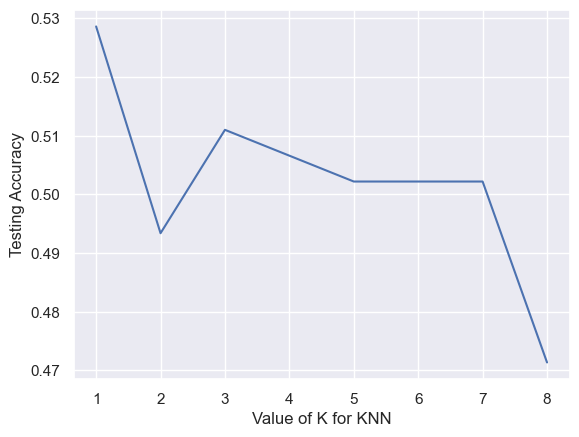

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

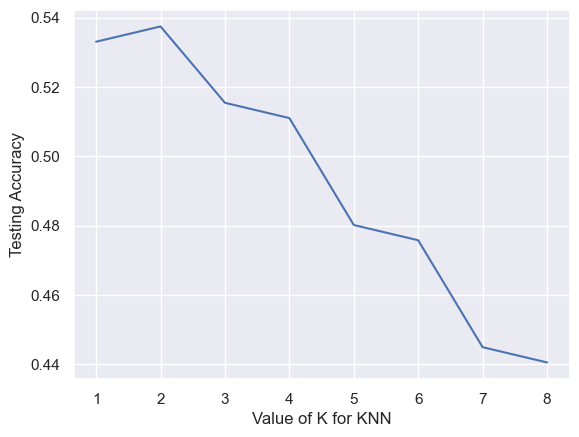

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

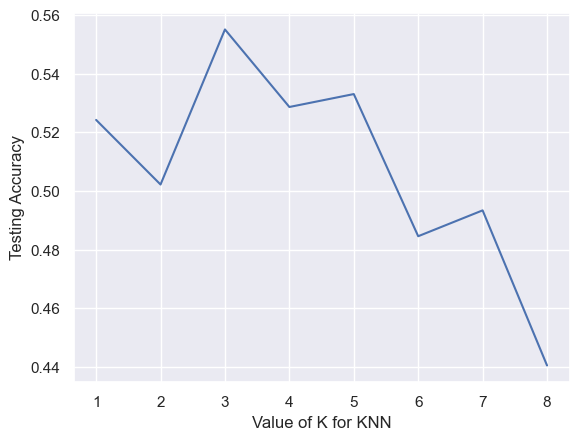

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

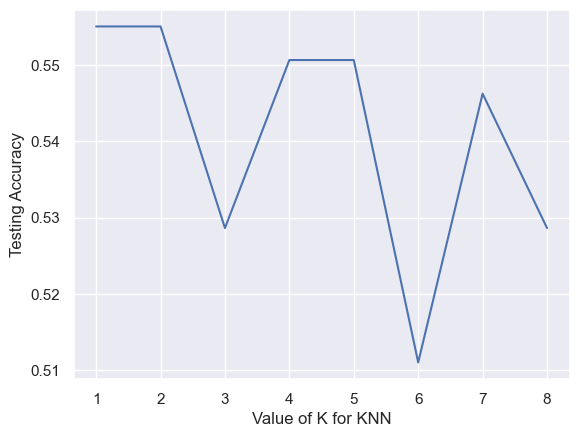

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

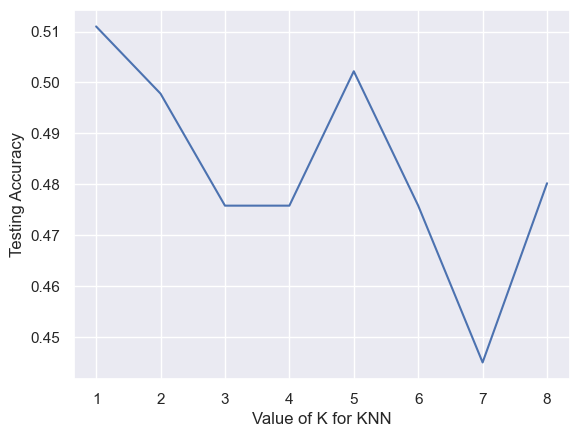

In [42]:
combined_data_together_overall_temp = combined_data_together_overall.iloc[1:,:].copy()
combined_data_together_overall_temp.insert(1, live_birth_monthly_change.columns[1], live_birth_monthly_change.iloc[:, 1])

temp_X = combined_data_together_overall_temp.copy()
temp_X.fillna(temp_X.mean(), inplace=True)
temp_X

y = combined_data_together_overall_temp["Change in Live Birth"]
X = pd.DataFrame(temp_X.drop(columns=["Year_Month", "live births no.", 'Change in Live Birth'], axis = 1))

k_range = range(1, X.shape[1]+1)

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    scores = {}
    scores_list = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test, y_pred)
        scores_list.append(metrics.accuracy_score(y_test, y_pred))
    plt.plot(k_range, scores_list)
    plt.xlabel("Value of K for KNN")
    plt.ylabel("Testing Accuracy")
    plt.show()

## KNN after Feature Reduction (Raw Data)

C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\2528614171.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp_X.fillna(temp_X.mean(), inplace=True)
C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\2528614171.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_X.fillna(temp_X.mean(), inplace=True)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

Text(0, 0.5, 'Testing Accuracy')

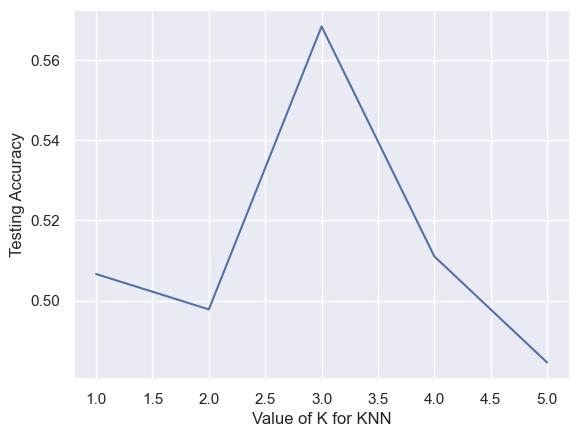

In [49]:
combined_data_together_overall_temp = combined_data_together_overall.iloc[1:,:].copy()
combined_data_together_overall_temp.insert(1, live_birth_monthly_change.columns[1], live_birth_monthly_change.iloc[:, 1])

temp_X = combined_data_together_overall_temp.copy()
temp_X.fillna(temp_X.mean(), inplace=True)
temp_X

y = combined_data_together_overall_temp["Change in Live Birth"]
X = pd.DataFrame(temp_X.drop(columns=["Year_Month", "live births no.", 'Change in Live Birth'], axis = 1))

X = X.drop(X.columns[[(4-1),(6-1),(8-1)]], axis=1)

k_range = range(1, X.shape[1]+1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

## KNN (Change Data)

In [58]:
sb.pairplot(combined_changed_data_together_overall, hue="Change in Live Birth", height=3);
plt.show()

C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\2408097900.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp_X.fillna(temp_X.mean(), inplace=True)
C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\2408097900.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_X.fillna(temp_X.mean(), inplace=True)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

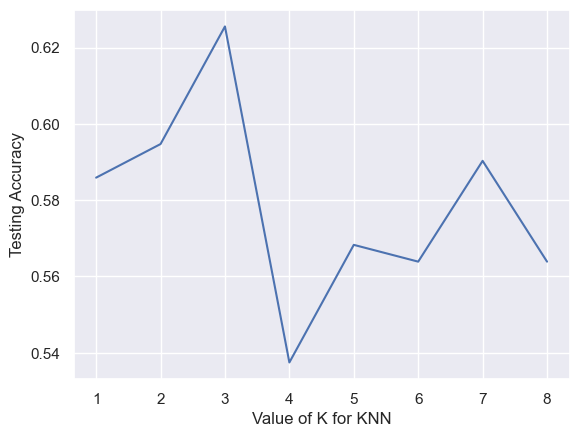

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

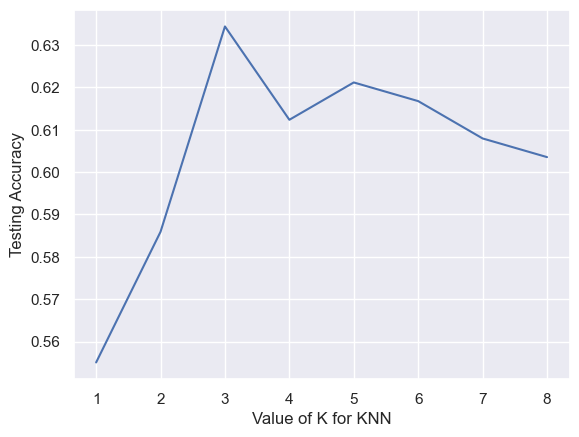

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

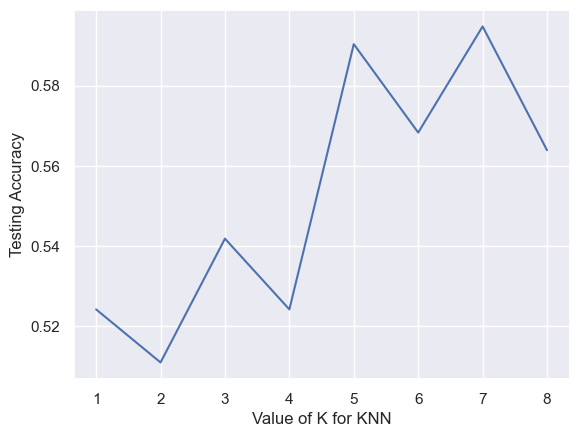

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [54]:
temp_X = combined_changed_data_together_overall.copy()

temp_X.replace([np.inf, -np.inf], np.nan, inplace=True)
temp_X.fillna(temp_X.mean(), inplace=True)

temp_X

y = combined_data_together_overall_temp["Change in Live Birth"]
X = pd.DataFrame(temp_X.drop(columns=["Year_Month", "Change in Live Birth", 'Change in Live Birth Number'], axis = 1))

k_range = range(1, X.shape[1]+1)

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    scores = {}
    scores_list = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test, y_pred)
        scores_list.append(metrics.accuracy_score(y_test, y_pred))
    plt.plot(k_range, scores_list)
    plt.xlabel("Value of K for KNN")
    plt.ylabel("Testing Accuracy")
    plt.show()

## KNN after Feature Reduction (Change Data)

C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\1233856137.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp_X.fillna(temp_X.mean(), inplace=True)
C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\1233856137.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_X.fillna(temp_X.mean(), inplace=True)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

Text(0, 0.5, 'Testing Accuracy')

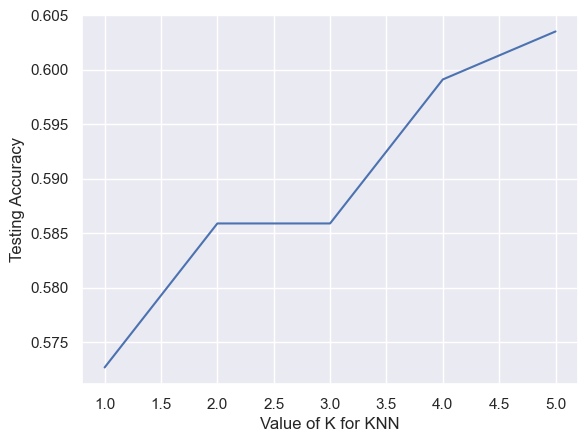

In [56]:
temp_X = combined_changed_data_together_overall.copy()

temp_X.replace([np.inf, -np.inf], np.nan, inplace=True)
temp_X.fillna(temp_X.mean(), inplace=True)

temp_X

y = combined_data_together_overall_temp["Change in Live Birth"]
X = pd.DataFrame(temp_X.drop(columns=["Year_Month", "Change in Live Birth", 'Change in Live Birth Number'], axis = 1))

X = X.drop(X.columns[[(1-1),(3-1),(4-1)]], axis=1)

k_range = range(1, X.shape[1]+1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

## KNN (% Change Data)

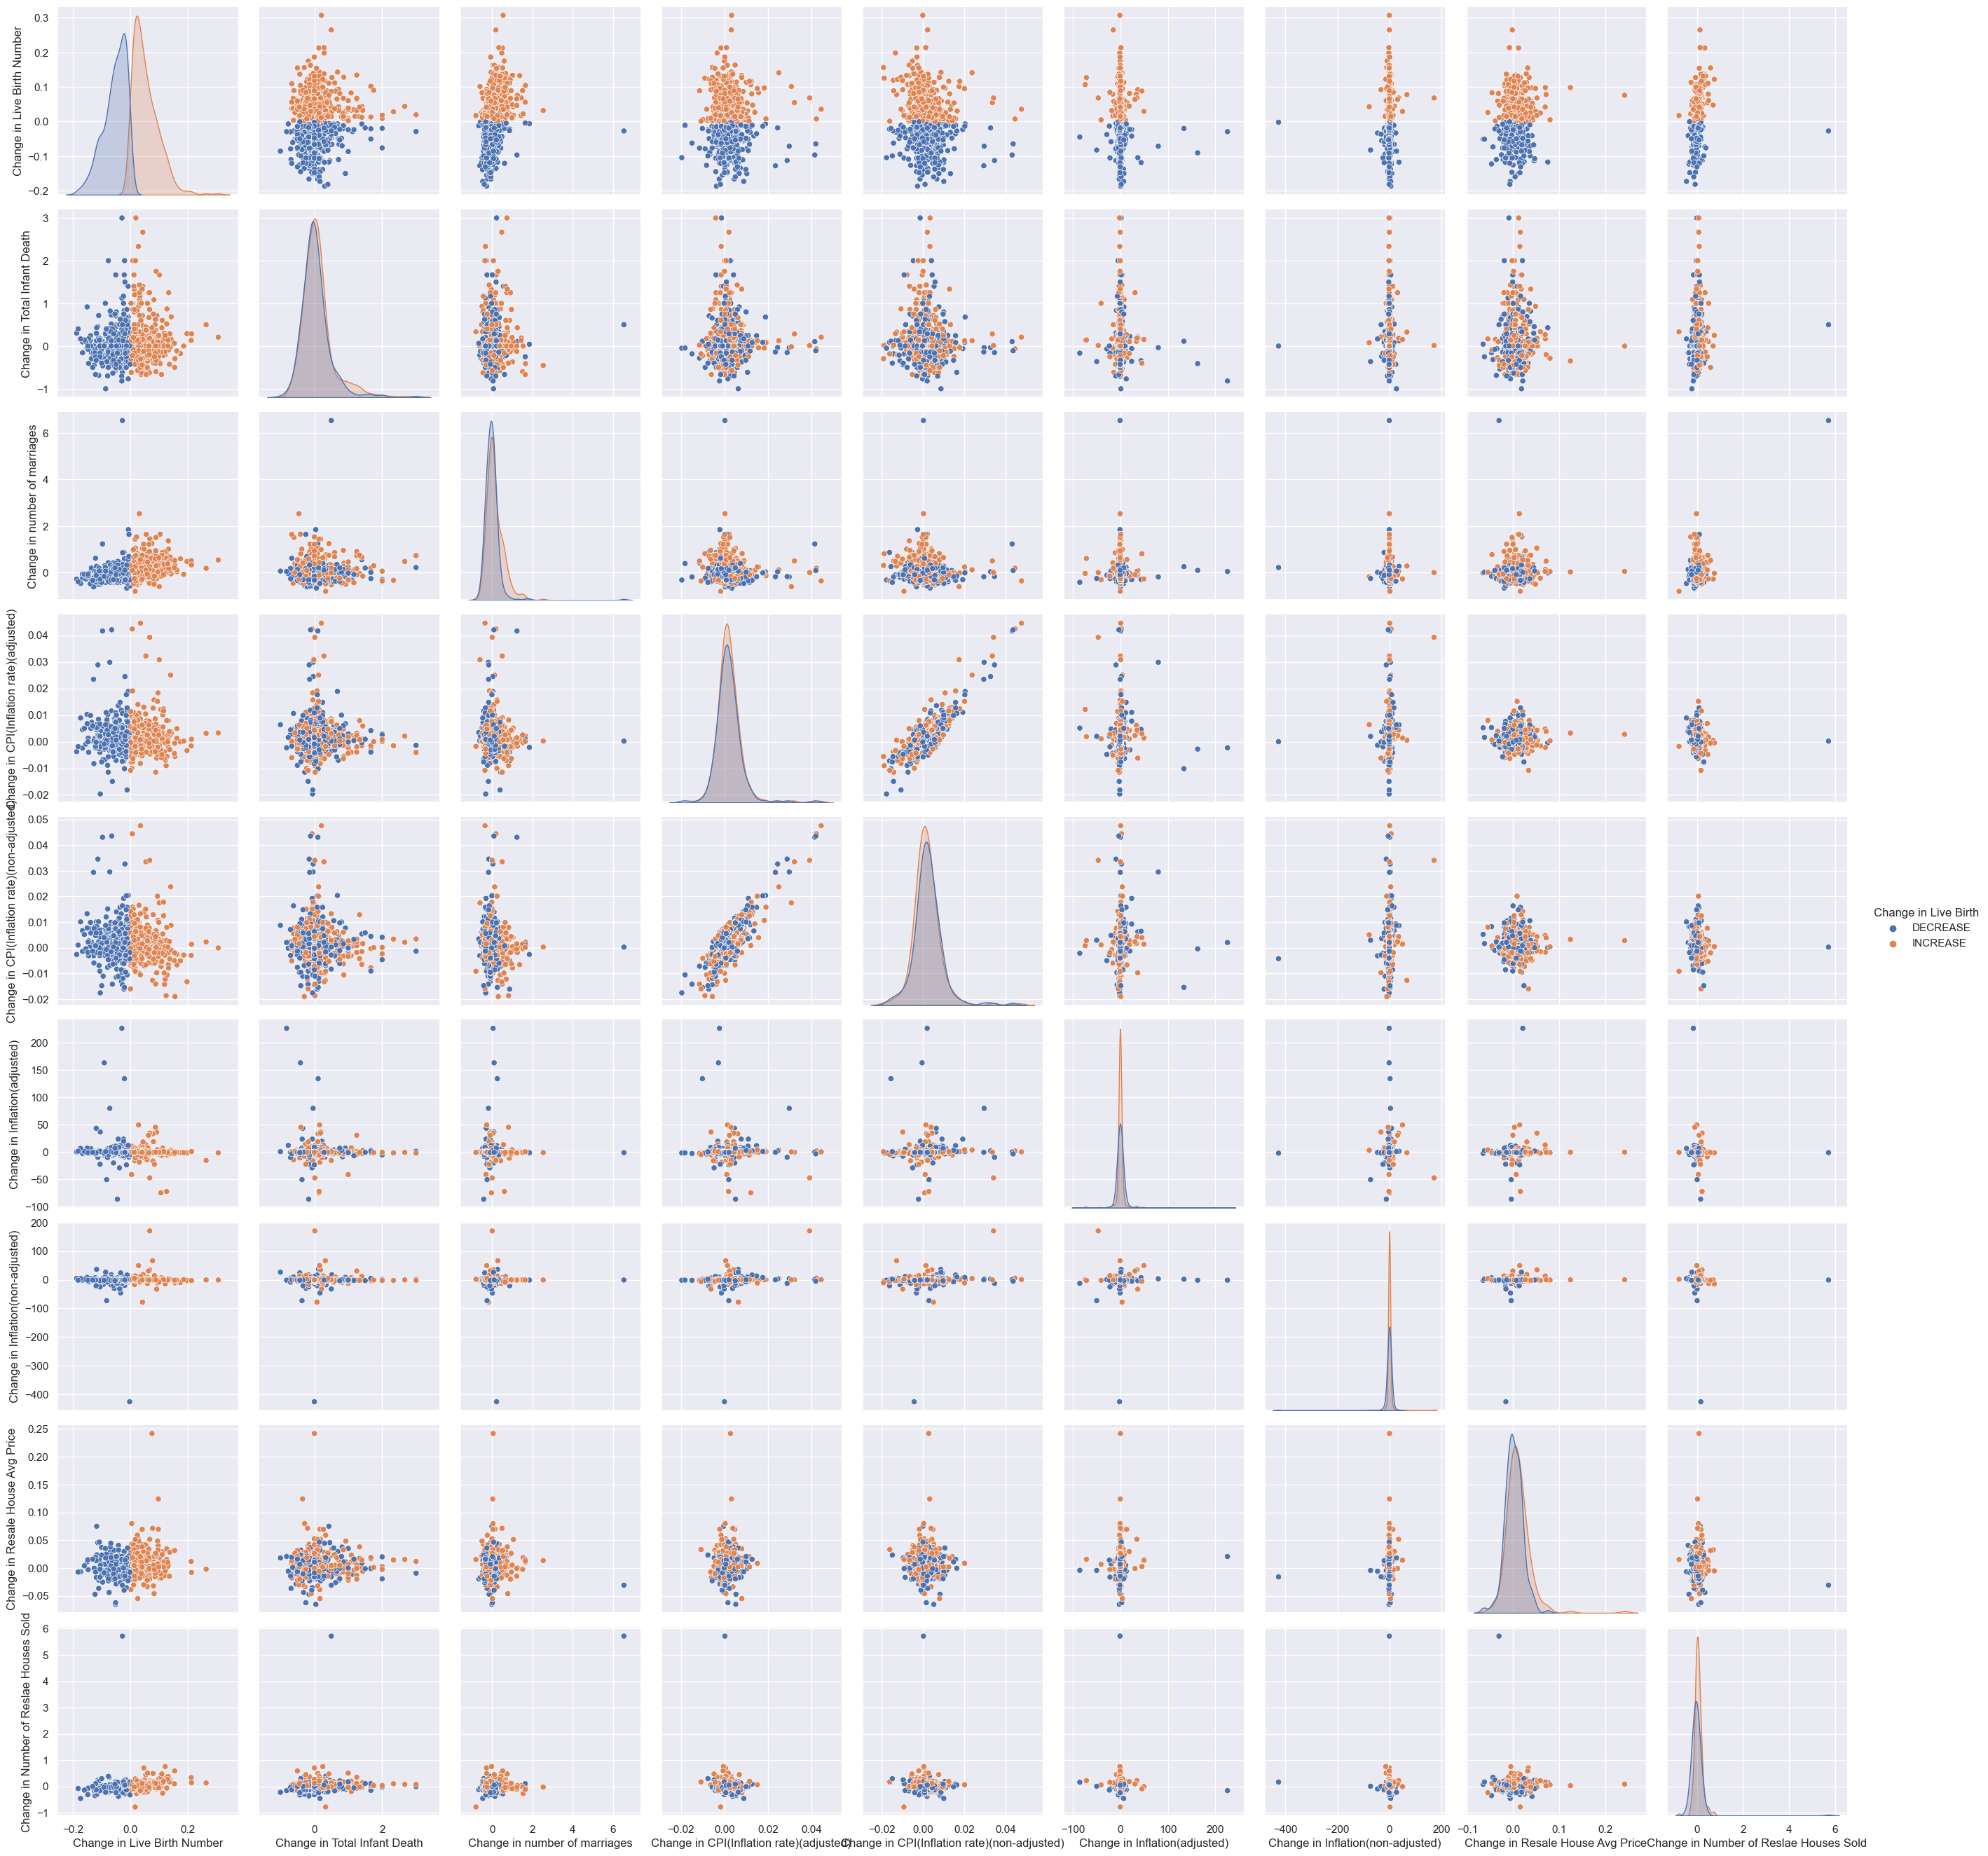

In [59]:
sb.pairplot(combined_changed_data_together_overall_percent, hue="Change in Live Birth", height=3);
plt.show()

C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\1567495057.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp_X.fillna(temp_X.mean(), inplace=True)
C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\1567495057.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_X.fillna(temp_X.mean(), inplace=True)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

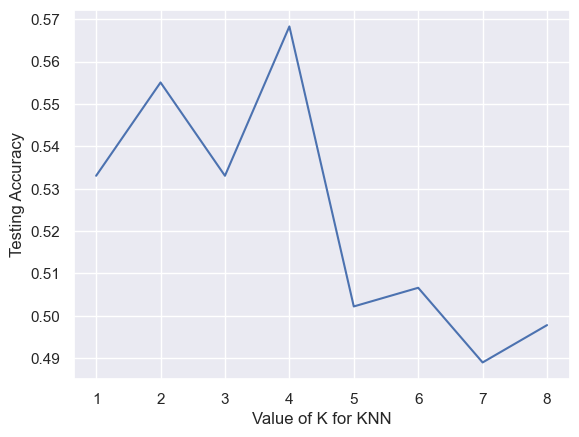

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

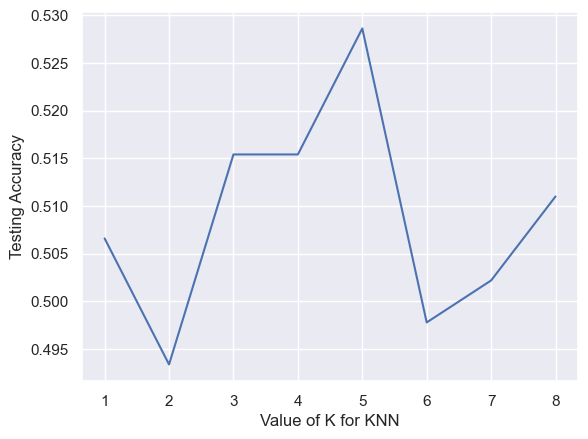

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

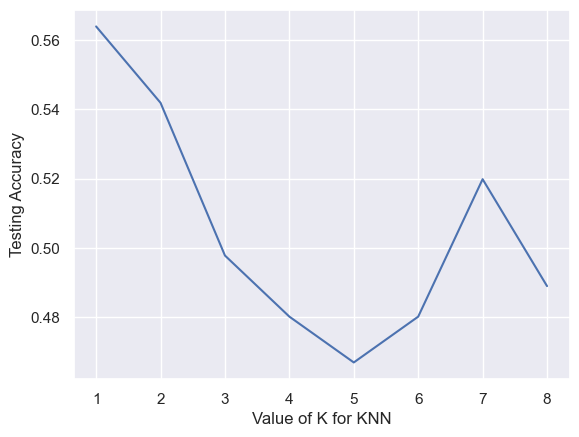

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

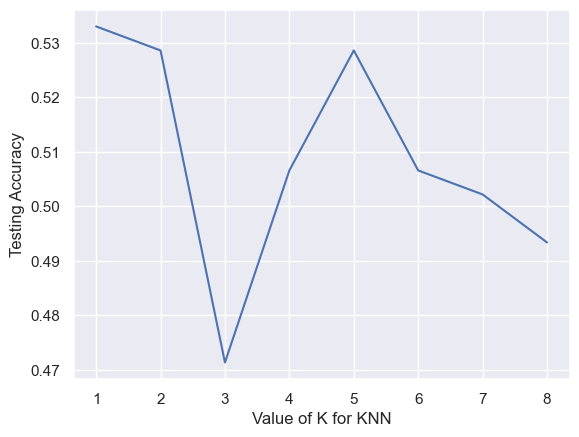

E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

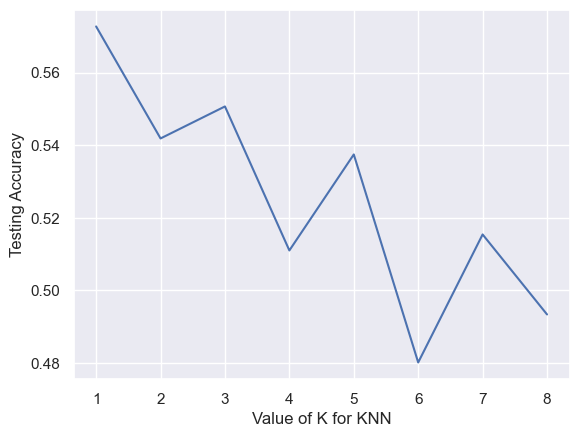

In [51]:
temp_X = combined_changed_data_together_overall_percent.copy()

temp_X.replace([np.inf, -np.inf], np.nan, inplace=True)
temp_X.fillna(temp_X.mean(), inplace=True)

temp_X

y = combined_data_together_overall_temp["Change in Live Birth"]
X = pd.DataFrame(temp_X.drop(columns=["Year_Month", "Change in Live Birth", 'Change in Live Birth Number'], axis = 1))

k_range = range(1, X.shape[1]+1)

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    scores = {}
    scores_list = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test, y_pred)
        scores_list.append(metrics.accuracy_score(y_test, y_pred))
    plt.plot(k_range, scores_list)
    plt.xlabel("Value of K for KNN")
    plt.ylabel("Testing Accuracy")
    plt.show()

## KNN after Feature Reduction (% Change Data)

C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\1569884416.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp_X.fillna(temp_X.mean(), inplace=True)
C:\Users\Audric Ho\AppData\Local\Temp\ipykernel_35080\1569884416.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_X.fillna(temp_X.mean(), inplace=True)
E:\sxhollzz\y1s2_labs\sc1015\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

Text(0, 0.5, 'Testing Accuracy')

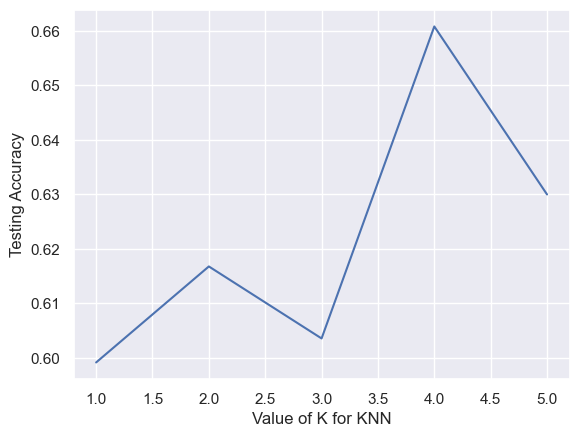

In [53]:
temp_X = combined_changed_data_together_overall_percent.copy()

temp_X.replace([np.inf, -np.inf], np.nan, inplace=True)
temp_X.fillna(temp_X.mean(), inplace=True)

temp_X

y = combined_data_together_overall_temp["Change in Live Birth"]
X = pd.DataFrame(temp_X.drop(columns=["Year_Month", "Change in Live Birth", 'Change in Live Birth Number'], axis = 1))

X = X.drop(X.columns[[(3-1),(5-1),(6-1)]], axis=1)

k_range = range(1, X.shape[1]+1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")